### Deliverable 1: Preprocessing the Data for a Neural Network

In [ ]:
# !pip install --upgrade tensorflow

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [46]:
import pandas as pd
import io
application_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
## If local run:
# application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [47]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME', 'APPLICATION_TYPE', 'CLASSIFICATION', 'SPECIAL_CONSIDERATIONS'])
application_df.head()

,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Independent,ProductDev,Association,1,0,5000,1
1,Independent,Preservation,Co-operative,1,1-9999,108590,1
2,CompanySponsored,ProductDev,Association,1,0,5000,0
3,CompanySponsored,Preservation,Trust,1,10000-24999,6692,1
4,Independent,Heathcare,Trust,1,100000-499999,142590,1


In [48]:
application_df = application_df[application_df.INCOME_AMT != "0"]
application_df.head()

,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
1,Independent,Preservation,Co-operative,1,1-9999,108590,1
3,CompanySponsored,Preservation,Trust,1,10000-24999,6692,1
4,Independent,Heathcare,Trust,1,100000-499999,142590,1
6,Independent,Preservation,Trust,1,100000-499999,31452,1
7,Independent,Preservation,Trust,1,10M-50M,7508025,1


In [49]:
# Determine the number of unique values in each column.
application_df.nunique()

AFFILIATION         6
USE_CASE            5
ORGANIZATION        4
STATUS              2
INCOME_AMT          8
ASK_AMT          8676
IS_SUCCESSFUL       2
dtype: int64

In [50]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['INCOME_AMT'].value_counts()
application_type_counts

25000-99999      3747
100000-499999    3374
1M-5M             955
1-9999            728
10000-24999       543
10M-50M           240
5M-10M            185
50M+              139
Name: INCOME_AMT, dtype: int64

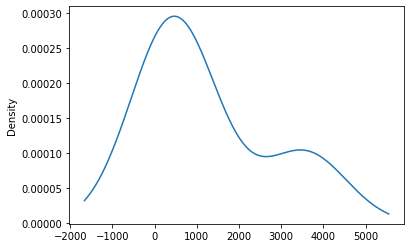

In [51]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [52]:
application_type_df = application_df['INCOME_AMT']
application_type_df

1               1-9999
3          10000-24999
4        100000-499999
6        100000-499999
7              10M-50M
             ...      
34284            1M-5M
34287      25000-99999
34289      25000-99999
34290           1-9999
34298            1M-5M
Name: INCOME_AMT, Length: 9911, dtype: object

In [45]:
# Determine which values to replace if counts are less than ...?
# app_type_counts_threshold = 1000
# replace_application1 = application_type_counts[application_type_counts > app_type_counts_threshold].index.tolist()
# replace_application2 = application_type_df[application_type_df == "1-9999"].index.tolist()
# replace_application3 = application_type_df[application_type_df == "10000-24999"].index.tolist()

# replace_application = replace_application1 + replace_application2 + replace_application3

# # Replace in dataframe
# for app in replace_application:
#     application_df.INCOME_AMT = application_df.INCOME_AMT.replace(app,"Less than 1M")
    
# # Check to make sure binning was successful
# application_df.INCOME_AMT.value_counts()

Less than 1M    7121
1M-5M            955
1-9999           728
10000-24999      543
10M-50M          240
5M-10M           185
50M+             139
Name: INCOME_AMT, dtype: int64

In [ ]:
replace_application2 = application_type_counts[application_type_counts == "1-9999"].index.tolist()
replace_application3 = application_type_counts[application_type_counts == "10000-24999"].index.tolist()

In [53]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['USE_CASE'].value_counts()
classification_value_counts

Preservation     8380
ProductDev       1339
Heathcare         134
CommunityServ      56
Other               2
Name: USE_CASE, dtype: int64

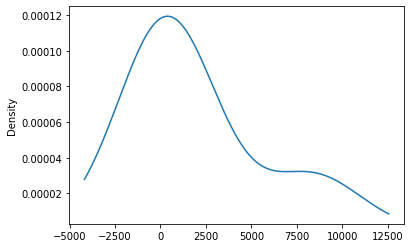

In [54]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density()

In [55]:
application_df.head()

,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
1,Independent,Preservation,Co-operative,1,1-9999,108590,1
3,CompanySponsored,Preservation,Trust,1,10000-24999,6692,1
4,Independent,Heathcare,Trust,1,100000-499999,142590,1
6,Independent,Preservation,Trust,1,100000-499999,31452,1
7,Independent,Preservation,Trust,1,10M-50M,7508025,1


In [ ]:
# Determine which values to replace if counts are less than ..?
# clss_type_counts_threshold = 500
# replace_class= classification_value_counts[classification_value_counts < clss_type_counts_threshold].index.tolist()


# # Replace in dataframe
# for cls in replace_class:
#     application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [56]:
# Generate our categorical variable lists
app_categories = application_df.dtypes[application_df.dtypes =="object"].index.tolist()
app_categories

['AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [57]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_categories]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_categories)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
# Merge one-hot encoded features and drop the originals
app_df = application_df.merge(encode_df,left_index=True, right_index=True)
app_df = app_df.drop(app_categories,1)
app_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
1,1,108590,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1,31452,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1,7508025,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Split our preprocessed data into our features and target arrays
y = app_df["IS_SUCCESSFUL"].values
X = app_df.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

KeyError: ignored

In [60]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [61]:
number_input_features = len(X_train[0])
number_input_features

25

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2080      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,181
Trainable params: 6,181
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [64]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5
    )

In [65]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=cp_callback)

Epoch 1/100
 1/65 [..............................] - ETA: 3:25 - loss: 0.6727 - accuracy: 0.5625
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
11/65 [====>.........................] - ETA: 0s - loss: 0.6966 - accuracy: 0.5455  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
23/65 [=========>....................] - ETA: 0s - loss: 0.6844 - accuracy: 0.5856
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
34/65 [==============>...............] - ETA: 0s - loss: 0.6813 - accuracy: 0.5938
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
43/65 [==================>...........] - ETA: 0s - loss: 0.6822 - accuracy: 0.5930
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoi

In [66]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

22/22 - 0s - loss: 0.7788 - accuracy: 0.5937 - 170ms/epoch - 8ms/step
Loss: 0.778839111328125, Accuracy: 0.5936599373817444


In [68]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")
files.download("AlphabetSoupCharity.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>